In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('data/Portfolio.csv', index_col=0)
data

,X,Y
1,-0.895251,-0.234924
2,-1.562454,-0.885176
3,-0.417090,0.271888
4,1.044356,-0.734198
5,-0.315568,0.841983
...,...,...
96,0.479091,1.454774
97,-0.535020,-0.399175
98,-0.773129,-0.957175
99,0.403634,1.396038


In [18]:
def alpha(X,Y):
    return ((np.var(Y)-np.cov(X,Y)[0][1])/(np.var(X)+np.var(Y)-2*np.cov(X,Y)[0][1]))

In [19]:
X = data['X']
Y = data['Y']
alpha(X, Y)

0.5766511516104116

In [41]:
result = []
for i in range(1000):
    bstrap_sample = data.sample(frac=1, replace=True)
    X = bstrap_sample['X']
    Y = bstrap_sample['Y']
    result.append(alpha(X, Y))
print('Bootstrap alpha: %.2f' %np.mean(result))
print('Standard error: %.4f' %np.std(result, ddof=1))

Bootstrap alpha: 0.58
Standard error: 0.0934


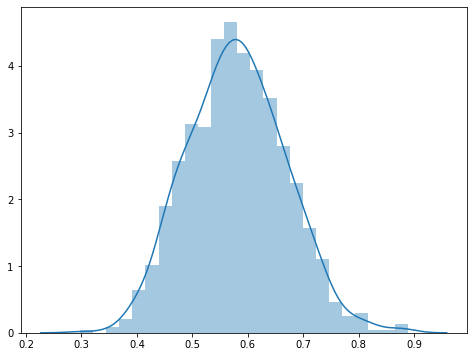

In [38]:
plt.figure(figsize=(8,6))
sb.distplot(result);

In [43]:
auto = pd.read_csv('data/Auto.csv', na_values='?').dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [45]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 40.6+ KB


In [47]:
model = LinearRegression()
X = auto['horsepower'].values.reshape(-1,1)
Y = auto['mpg']

In [59]:
lm = model.fit(X, Y)
print('Beta_0: {:.2f}, \t Beta_1: {:.2f}'.format(lm.intercept_, lm.coef_[0]))

Beta_0: 40.21, 	 Beta_1: -0.16


In [57]:
# Perform Bootstrap method
beta = pd.DataFrame(columns=['Beta_0', 'Beta_1'])
for i in range(1000):
    bstrap_sample = auto.sample(frac=1, replace=True)
    X = bstrap_sample['horsepower'].values.reshape(-1,1)
    Y = bstrap_sample['mpg']
    lm = model.fit(X,Y)
    beta = beta.append({'Beta_0': lm.intercept_, 'Beta_1': lm.coef_[0]}, ignore_index=True)
print('By Bootstrap method, Mean Beta_0: {:.2f}, \t Beta_1: {:.2f}'.format(beta['Beta_0'].mean(), beta['Beta_1'].mean()))
print('Standard error for Beta_0: {:.4f}, \t\t Beta_1: {:.4f}'.format(np.std(beta['Beta_0'], ddof=1), np.std(beta['Beta_1'], ddof=1)))

By Bootstrap method, Mean Beta_0: 39.94, 	 Beta_1: -0.16
Standard error for Beta_0: 0.8612, 		 Beta_1: 0.0075
